In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Add, UpSampling2D, Concatenate


## Task 01

####Data loading and normalizing

In [ ]:
(X_Train, Y_Train), (X_Test, Y_Test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


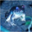

Ground Truth:  [3]


In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(X_Train[0])
print("Ground Truth: ", Y_Test[0])

In [ ]:
X_Train = X_Train / 255
X_Train = X_Train[..., np.newaxis]
X_Test = X_Test / 255
X_Test = X_Test[..., np.newaxis]
print("Train Data Shape: ", X_Train.shape)
print("Test Data Shape: ", X_Test.shape)

Train Data Shape:  (50000, 32, 32, 3, 1)
Test Data Shape:  (10000, 32, 32, 3, 1)


In [ ]:
def convolution_block(inp,num_filter,pool=False,pool_size=(2,2)):
    x = Conv2D(num_filter,(3,3),activation='relu', padding='same')(inp)
    x = BatchNormalization()(x)
    if pool:
        x = MaxPooling2D(pool_size)(x)
    return x

In [ ]:
inp = Input(shape=(32,32,3))
conv1 = convolution_block(inp,num_filter=8)
conv2 = convolution_block(conv1,num_filter=16,pool=True)
res1 = convolution_block(conv2,num_filter=16)
res1 = convolution_block(res1,num_filter=16)
skip1 = Add()([res1,conv2])


## AUXILLARY LOSS ##
aux = MaxPooling2D((2,2))(skip1)
aux = Flatten()(aux)
aux = Dense(10,activation='softmax')(aux)

conv3 = convolution_block(skip1,num_filter=32)
conv4 = convolution_block(conv3,num_filter=32,pool=True)
res2 = convolution_block(conv4,num_filter=32)
res2 = convolution_block(res2,num_filter=32)
skip2 = Add()([res2,conv4])

x = MaxPooling2D((2,2))(skip2)
x = Flatten()(x)
x = Dense(10,activation='softmax')(x)


model = Model(inputs=inp,outputs=x)

####**Without Auxillary**

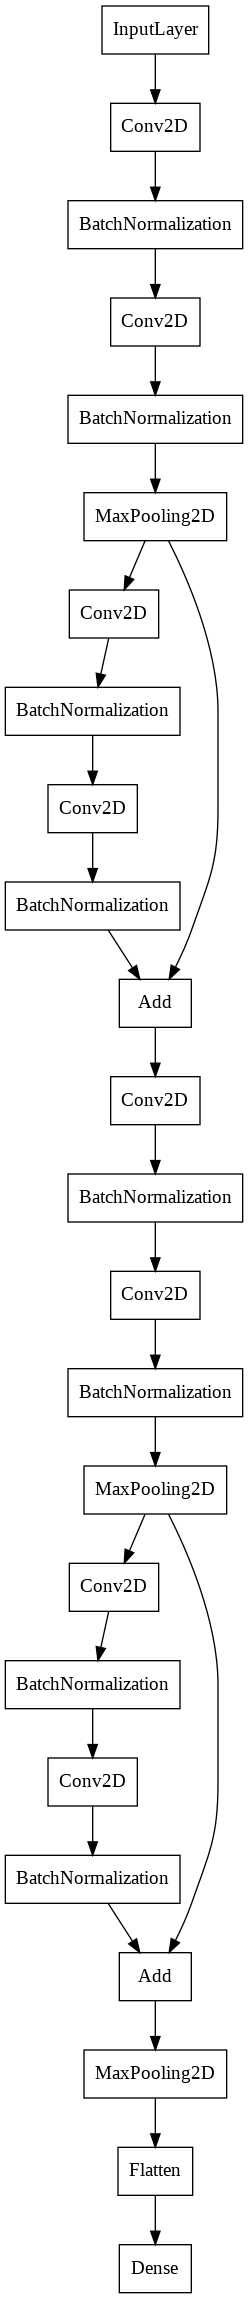

In [ ]:
tf.keras.utils.plot_model(model,'model1.png',show_layer_names=False)

In [ ]:
model.compile(optimizer='adam',loss=['sparse_categorical_crossentropy'],metrics=['accuracy'])

In [ ]:
history=model.fit(X_Train,Y_Train,epochs=10,validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 20s 13ms/step - loss: 1.5625 - accuracy: 0.4670 - val_loss: 1.2776 - val_accuracy: 0.5448
Epoch 2/10
1407/1407 [==============================] - 18s 13ms/step - loss: 1.0943 - accuracy: 0.6158 - val_loss: 1.0252 - val_accuracy: 0.6446
Epoch 3/10
1407/1407 [==============================] - 17s 12ms/step - loss: 0.9278 - accuracy: 0.6755 - val_loss: 1.0712 - val_accuracy: 0.6254
Epoch 4/10
1407/1407 [==============================] - 18s 12ms/step - loss: 0.8216 - accuracy: 0.7127 - val_loss: 0.9252 - val_accuracy: 0.6774
Epoch 5/10
1407/1407 [==============================] - 18s 13ms/step - loss: 0.7483 - accuracy: 0.7384 - val_loss: 0.8056 - val_accuracy: 0.7286
Epoch 6/10
1407/1407 [==============================] - 18s 13ms/step - loss: 0.6875 - accuracy: 0.7595 - val_loss: 0.7864 - val_accuracy: 0.7244
Epoch 7/10
1407/1407 [==============================] - 18s 13ms/step - loss: 0.6340 - accuracy: 0.7765 - val_loss: 0.7446 -

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


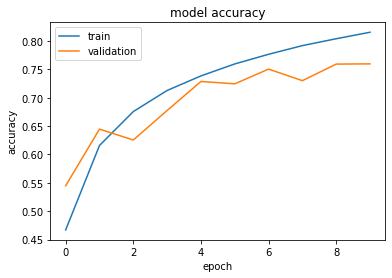

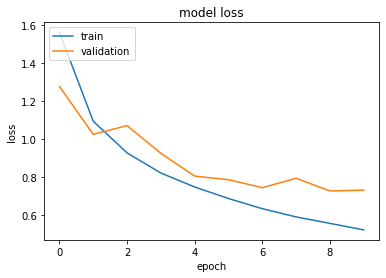

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Testing**

In [ ]:
model.evaluate(X_Test,Y_Test)

313/313 [==============================] - 2s 6ms/step - loss: 0.7744 - accuracy: 0.7428


[0.774364709854126, 0.7427999973297119]

####**With Auxillary**

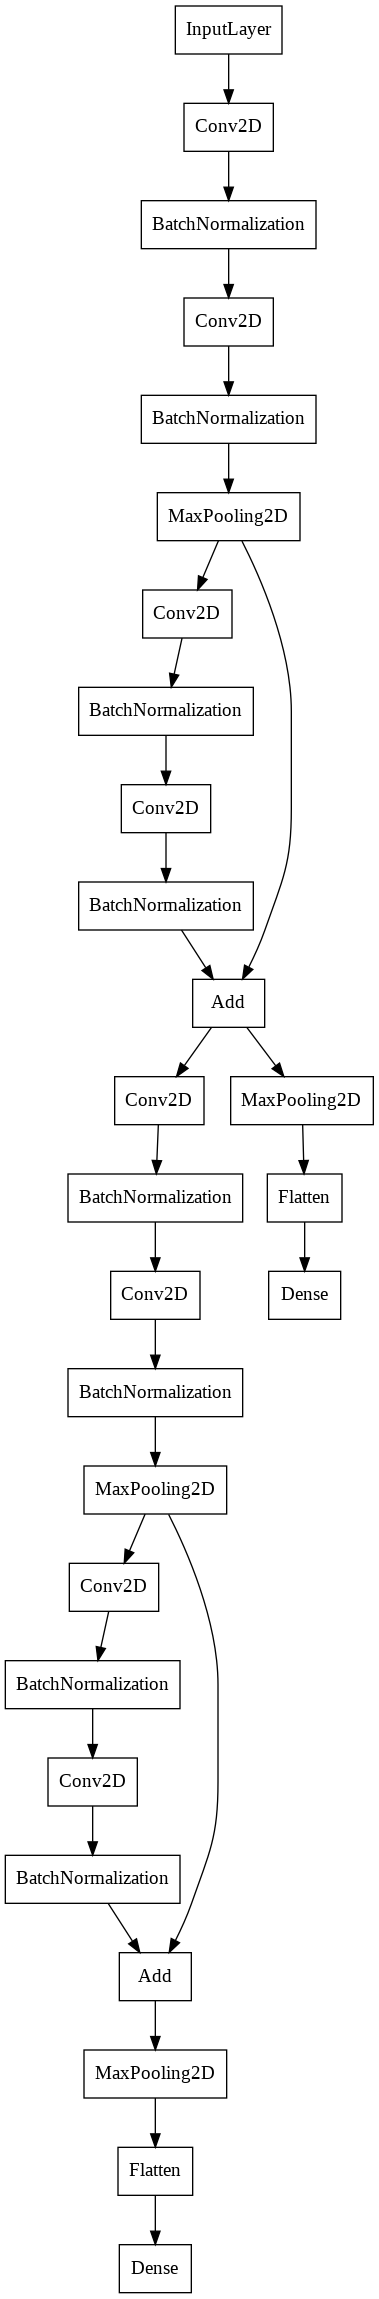

In [ ]:
model2 = Model(inputs=inp,outputs=[x,aux])
tf.keras.utils.plot_model(model2,'model2.png',show_layer_names=False)

In [ ]:
model2.compile(optimizer='adam',loss=['sparse_categorical_crossentropy','sparse_categorical_crossentropy'], loss_weights=[0.7,0.3],metrics=['accuracy'])

In [ ]:
history2=model2.fit(X_Train,Y_Train,epochs=10,validation_split=0.05)

Epoch 1/10
1485/1485 [==============================] - 21s 14ms/step - loss: 0.3959 - dense_5_loss: 0.2408 - dense_4_loss: 0.7579 - dense_5_accuracy: 0.9145 - dense_4_accuracy: 0.7341 - val_loss: 0.7534 - val_dense_5_loss: 0.6838 - val_dense_4_loss: 0.9159 - val_dense_5_accuracy: 0.7988 - val_dense_4_accuracy: 0.7004
Epoch 2/10
1485/1485 [==============================] - 21s 14ms/step - loss: 0.3818 - dense_5_loss: 0.2232 - dense_4_loss: 0.7520 - dense_5_accuracy: 0.9208 - dense_4_accuracy: 0.7375 - val_loss: 0.7752 - val_dense_5_loss: 0.7157 - val_dense_4_loss: 0.9141 - val_dense_5_accuracy: 0.8088 - val_dense_4_accuracy: 0.6940
Epoch 3/10
1485/1485 [==============================] - 21s 14ms/step - loss: 0.3737 - dense_5_loss: 0.2137 - dense_4_loss: 0.7471 - dense_5_accuracy: 0.9218 - dense_4_accuracy: 0.7371 - val_loss: 0.7819 - val_dense_5_loss: 0.7268 - val_dense_4_loss: 0.9105 - val_dense_5_accuracy: 0.7992 - val_dense_4_accuracy: 0.6960
Epoch 4/10
1485/1485 [==================

In [ ]:
print(history2.history.keys())

dict_keys(['loss', 'dense_5_loss', 'dense_4_loss', 'dense_5_accuracy', 'dense_4_accuracy', 'val_loss', 'val_dense_5_loss', 'val_dense_4_loss', 'val_dense_5_accuracy', 'val_dense_4_accuracy'])


**Auxilary loss plot**

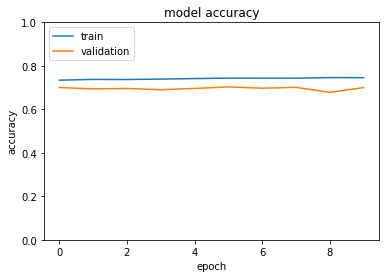

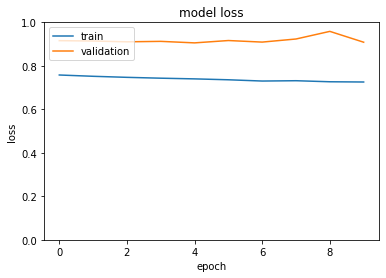

In [ ]:

plt.plot(history2.history['dense_4_accuracy'])
plt.plot(history2.history['val_dense_4_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history2.history['dense_4_loss'])
plt.plot(history2.history['val_dense_4_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

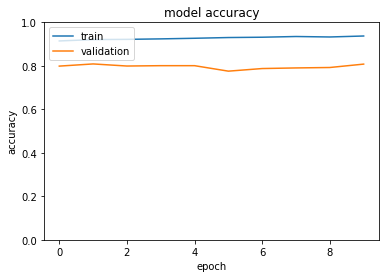

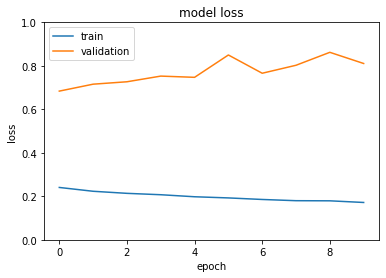

In [ ]:

plt.plot(history2.history['dense_5_accuracy'])
plt.plot(history2.history['val_dense_5_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history2.history['dense_5_loss'])
plt.plot(history2.history['val_dense_5_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Testing**

In [ ]:
model2.evaluate(X_Test,Y_Test)

313/313 [==============================] - 2s 7ms/step - loss: 1.1121 - dense_5_loss: 1.1721 - dense_4_loss: 0.9721 - dense_5_accuracy: 0.7465 - dense_4_accuracy: 0.6760


[1.112119197845459,
 1.1721447706222534,
 0.9720600843429565,
 0.7465000152587891,
 0.6759999990463257]

## Task 02

####Data loading and normalizing

In [ ]:
(X_Train, Y_Train), (X_Test, Y_Test) = tf.keras.datasets.cifar100.load_data()

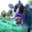

Ground Truth:  [49]


In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(X_Train[0])
print("Ground Truth: ", Y_Test[0])

In [ ]:
X_Train = X_Train / 255
X_Train = X_Train[..., np.newaxis]
X_Test = X_Test / 255
X_Test = X_Test[..., np.newaxis]
print("Train Data Shape: ", X_Train.shape)
print("Test Data Shape: ", X_Test.shape)

Train Data Shape:  (50000, 32, 32, 3, 1)
Test Data Shape:  (10000, 32, 32, 3, 1)


####**Without Auxillary**

In [ ]:
inp = Input(shape=(32,32,3))
conv1 = convolution_block(inp,num_filter=32)
conv2 = convolution_block(conv1,num_filter=32,pool=True)
res1 = convolution_block(conv2,num_filter=32)
res1 = convolution_block(res1,num_filter=32)
skip1 = Add()([res1,conv2])


## AUXILLARY LOSS ##
aux = MaxPooling2D((2,2))(skip1)
aux = Flatten()(aux)
aux = Dense(100,activation='softmax')(aux)

conv3 = convolution_block(skip1,num_filter=64)
conv4 = convolution_block(conv3,num_filter=64,pool=True)
res2 = convolution_block(conv4,num_filter=64)
res2 = convolution_block(res2,num_filter=64)
skip2 = Add()([res2,conv4])

x = MaxPooling2D((2,2))(skip2)
x = Flatten()(x)
x = Dense(100,activation='softmax')(x)


model = Model(inputs=inp,outputs=x)

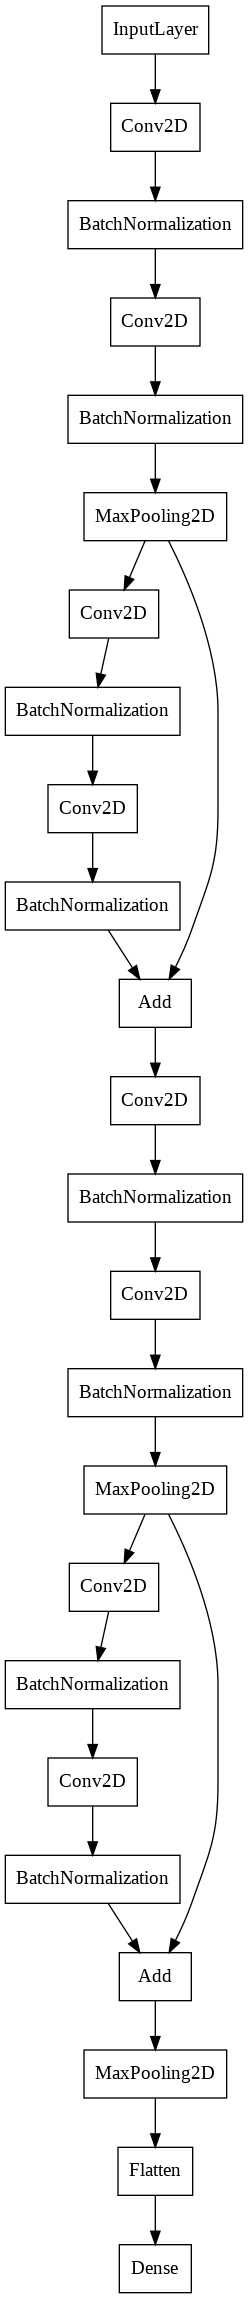

In [ ]:
tf.keras.utils.plot_model(model,'model1.png',show_layer_names=False)

In [ ]:
model.compile(optimizer='adam',loss=['sparse_categorical_crossentropy'],metrics=['accuracy'])

In [ ]:
history=model.fit(X_Train,Y_Train,epochs=10,validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 30s 20ms/step - loss: 3.6301 - accuracy: 0.1769 - val_loss: 3.1878 - val_accuracy: 0.2398
Epoch 2/10
1407/1407 [==============================] - 28s 20ms/step - loss: 2.5943 - accuracy: 0.3463 - val_loss: 2.6493 - val_accuracy: 0.3536
Epoch 3/10
1407/1407 [==============================] - 28s 20ms/step - loss: 2.1445 - accuracy: 0.4449 - val_loss: 2.3921 - val_accuracy: 0.3918
Epoch 4/10
1407/1407 [==============================] - 28s 20ms/step - loss: 1.8440 - accuracy: 0.5120 - val_loss: 2.2939 - val_accuracy: 0.4158
Epoch 5/10
1407/1407 [==============================] - 28s 20ms/step - loss: 1.6169 - accuracy: 0.5637 - val_loss: 2.2152 - val_accuracy: 0.4434
Epoch 6/10
1407/1407 [==============================] - 28s 20ms/step - loss: 1.4103 - accuracy: 0.6130 - val_loss: 2.2850 - val_accuracy: 0.4414
Epoch 7/10
1407/1407 [==============================] - 28s 20ms/step - loss: 1.2409 - accuracy: 0.6516 - val_loss: 2.3647 -

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


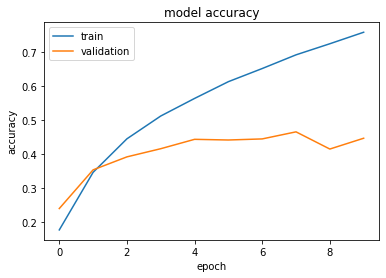

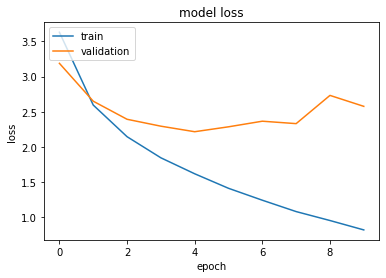

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Testing**

In [ ]:
model.evaluate(X_Test,Y_Test)

313/313 [==============================] - 3s 9ms/step - loss: 2.5051 - accuracy: 0.4590


[2.5050618648529053, 0.45899999141693115]

####**With Auxillary**

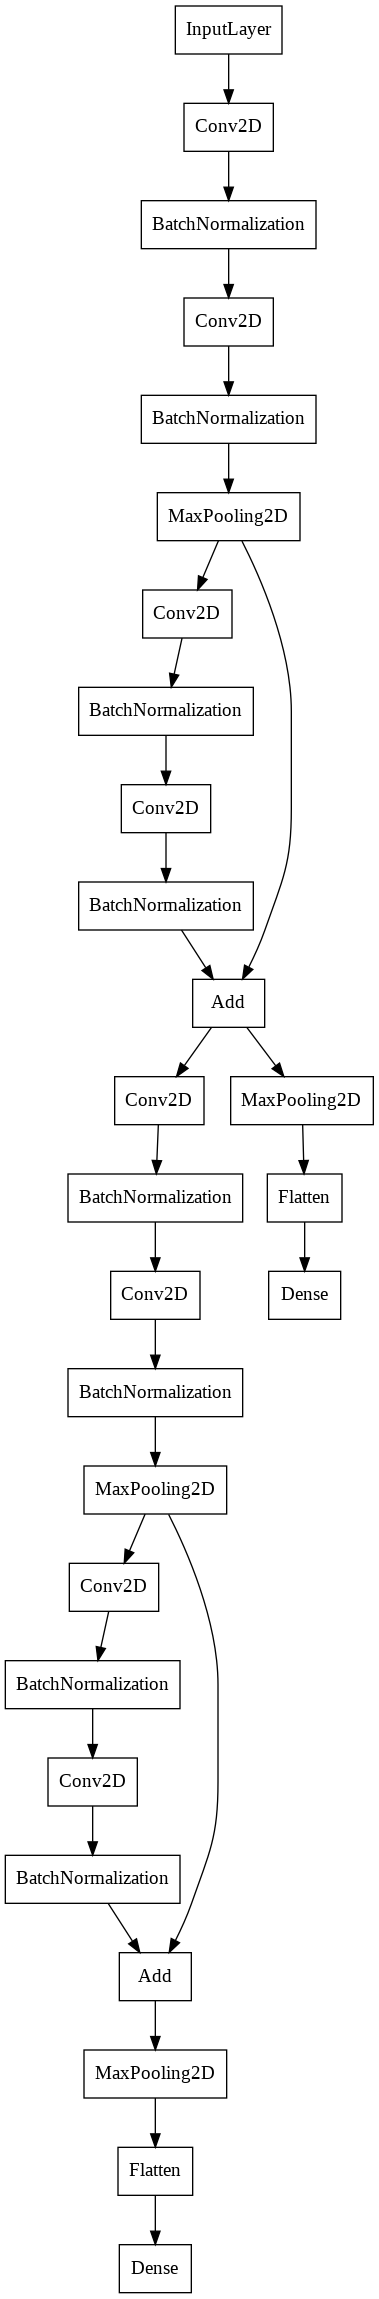

In [ ]:
model2 = Model(inputs=inp,outputs=[x,aux])
tf.keras.utils.plot_model(model2,'model2.png',show_layer_names=False)

In [ ]:
model2.compile(optimizer='adam',loss=['sparse_categorical_crossentropy','sparse_categorical_crossentropy'], loss_weights=[0.7,0.3],metrics=['accuracy'])

In [ ]:
history2=model2.fit(X_Train,Y_Train,epochs=10,validation_split=0.05)

Epoch 1/10
1485/1485 [==============================] - 35s 22ms/step - loss: 1.7113 - dense_5_loss: 0.9160 - dense_4_loss: 3.5671 - dense_5_accuracy: 0.7403 - dense_4_accuracy: 0.2836 - val_loss: 2.6538 - val_dense_5_loss: 2.5704 - val_dense_4_loss: 2.8482 - val_dense_5_accuracy: 0.4580 - val_dense_4_accuracy: 0.3604
Epoch 2/10
1485/1485 [==============================] - 30s 20ms/step - loss: 1.2046 - dense_5_loss: 0.7788 - dense_4_loss: 2.1983 - dense_5_accuracy: 0.7713 - dense_4_accuracy: 0.4546 - val_loss: 2.6006 - val_dense_5_loss: 2.5984 - val_dense_4_loss: 2.6059 - val_dense_5_accuracy: 0.4600 - val_dense_4_accuracy: 0.4140
Epoch 3/10
1485/1485 [==============================] - 30s 20ms/step - loss: 1.0228 - dense_5_loss: 0.6760 - dense_4_loss: 1.8319 - dense_5_accuracy: 0.7986 - dense_4_accuracy: 0.5247 - val_loss: 2.7230 - val_dense_5_loss: 2.7490 - val_dense_4_loss: 2.6624 - val_dense_5_accuracy: 0.4560 - val_dense_4_accuracy: 0.4064
Epoch 4/10
1485/1485 [==================

In [ ]:
print(history2.history.keys())

dict_keys(['loss', 'dense_5_loss', 'dense_4_loss', 'dense_5_accuracy', 'dense_4_accuracy', 'val_loss', 'val_dense_5_loss', 'val_dense_4_loss', 'val_dense_5_accuracy', 'val_dense_4_accuracy'])


**Auxilary loss plot**

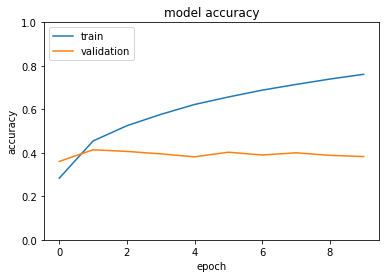

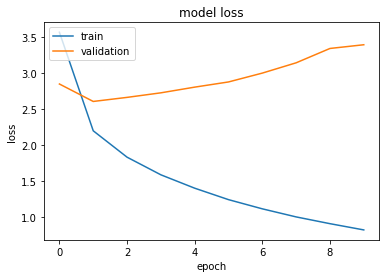

In [ ]:

plt.plot(history2.history['dense_4_accuracy'])
plt.plot(history2.history['val_dense_4_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history2.history['dense_4_loss'])
plt.plot(history2.history['val_dense_4_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'validation'], loc='upper left')
plt.show()

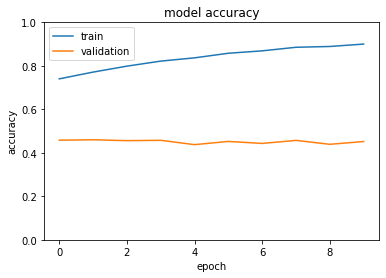

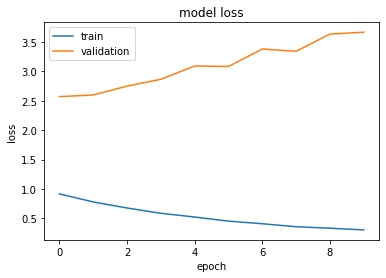

In [ ]:

plt.plot(history2.history['dense_5_accuracy'])
plt.plot(history2.history['val_dense_5_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history2.history['dense_5_loss'])
plt.plot(history2.history['val_dense_5_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Testing**

In [ ]:
model2.evaluate(X_Test,Y_Test)

313/313 [==============================] - 3s 10ms/step - loss: 3.6025 - dense_5_loss: 3.7058 - dense_4_loss: 3.3614 - dense_5_accuracy: 0.4500 - dense_4_accuracy: 0.3864


[3.6025257110595703,
 3.705847978591919,
 3.3614401817321777,
 0.44999998807907104,
 0.3864000141620636]

## Task 03

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [25]:
# Loading the dataset
transform = transforms.Compose([transforms.ToTensor()])

In [26]:

train_dataset = datasets.FashionMNIST(root = './data', train = True, download = True, transform = transform)
test_dataset = datasets.FashionMNIST(root = './data', train = False, download = True, transform = transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 32, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 32, shuffle = False)

In [46]:
# Defining the model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size = 3, stride = 1, padding = 1)
        self.conv2 = nn.Conv2d(16, 4, kernel_size = 3, stride = 1, padding = 1)
        self.conv3 = nn.Conv2d(4, 16, kernel_size = 3, stride = 1, padding = 1)
        self.conv4 = nn.Conv2d(16, 1, kernel_size = 3, stride = 1, padding = 1)
        self.pool = nn.AvgPool2d(2, 2)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        return x

model = Autoencoder()

In [47]:
# Training the model
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [48]:
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, data)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data))

In [49]:
# Testing the model
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile = True), Variable(target)
        output = model(data)
        test_loss += criterion(output, data).data
        pred = output.data.max(1, keepdim = True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()
    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}\n'.format(test_loss))

In [50]:
# Visualizing the reconstructed images
import torchvision
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [51]:
def show_reconstructions(model, save=False):
    images, labels = next(iter(test_loader))
    true_images = Variable(images.view(32, 1, 28, 28))
    output_images = model(true_images.view(32, 1, 28, 28))
    true_images = true_images.data
    output_images = output_images.data
    grid = torchvision.utils.make_grid(true_images)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))
    plt.title('Original images')
    plt.show()
    grid = torchvision.utils.make_grid(output_images)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))
    plt.title('Autoencoder reconstructions')
    plt.show()

In [ ]:

for epoch in range(1, 10 + 1):
    train(epoch)
    test()


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([32, 1, 28, 28])) that is different to the input size (torch.Size([32, 1, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Train Epoch: 1 [0/60000 (0%)]	Loss: 0.109145
Train Epoch: 1 [320/60000 (1%)]	Loss: 0.105704
Train Epoch: 1 [640/60000 (1%)]	Loss: 0.108521
Train Epoch: 1 [960/60000 (2%)]	Loss: 0.117557
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.106575
Train Epoch: 1 [1600/60000 (3%)]	Loss: 0.094398
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.106945
Train Epoch: 1 [2240/60000 (4%)]	Loss: 0.117707
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.098625
Train Epoch: 1 [2880/60000 (5%)]	Loss: 0.118953
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.118311
Train Epoch: 1 [3520/60000 (6%)]	Loss: 0.107021
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.104365
Train Epoch: 1 [4160/60000 (7%)]	Loss: 0.111358
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.118407
Train Epoch: 1 [4800/60000 (8%)]	Loss: 0.115100
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.115969
Train Epoch: 1 [5440/60000 (9%)]	Loss: 0.111004
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.107667
Train Epoch: 1 [6080/60000 (10%)]	Loss: 0.109523
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.09

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([16, 1, 28, 28])) that is different to the input size (torch.Size([16, 1, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Test set: Average loss: 0.0034

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.107959
Train Epoch: 2 [320/60000 (1%)]	Loss: 0.115846
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.126664
Train Epoch: 2 [960/60000 (2%)]	Loss: 0.113635
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.115828
Train Epoch: 2 [1600/60000 (3%)]	Loss: 0.121314
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.093990
Train Epoch: 2 [2240/60000 (4%)]	Loss: 0.113841
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.100883
Train Epoch: 2 [2880/60000 (5%)]	Loss: 0.106011
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.115697
Train Epoch: 2 [3520/60000 (6%)]	Loss: 0.099449
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.091002
Train Epoch: 2 [4160/60000 (7%)]	Loss: 0.089143
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.104187
Train Epoch: 2 [4800/60000 (8%)]	Loss: 0.109115
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.094024
Train Epoch: 2 [5440/60000 (9%)]	Loss: 0.119158
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.115669
Train Epoch: 2 [6080/60000 (10%)]	Loss: 0.113980
Train Epoch

####Reconstructed images

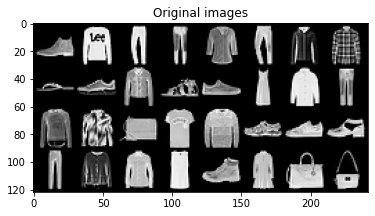

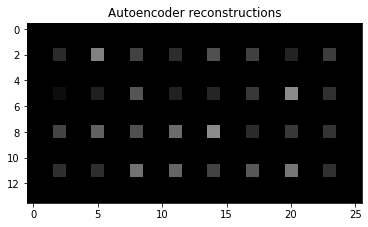

In [35]:
show_reconstructions(model)